In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


# Steps

- 0. Preprocess + EDA + Feature Selection
- 1. Extract input and output cols
- 2. Scale the values
- 3. Train test split
- 4. Train the model
- 5. Evaluate the model/model selection
- 6. Deploy the model

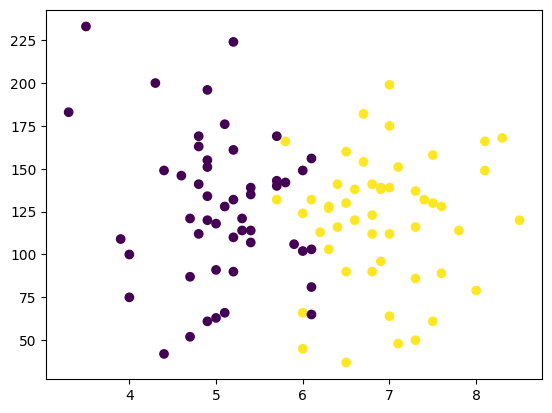

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [9]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [10]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
y.shape

(100,)

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [13]:
X_train

,cgpa,iq
27,6.0,124.0
86,5.1,128.0
15,5.1,176.0
83,7.5,130.0
37,8.1,149.0
...,...,...
80,4.9,196.0
55,7.8,114.0
32,7.0,139.0
51,4.8,141.0


In [14]:
y_train

27    1
86    0
15    0
83    1
37    1
     ..
80    0
55    1
32    1
51    0
65    1
Name: placement, Length: 90, dtype: int64

In [15]:
X_test

,cgpa,iq
57,6.5,130.0
81,5.4,107.0
99,6.2,113.0
66,6.9,96.0
69,8.5,120.0
20,6.6,120.0
97,6.7,182.0
68,4.0,75.0
38,6.5,160.0
75,4.8,169.0


In [16]:
from sklearn.preprocessing import StandardScaler
     
scaler = StandardScaler()


In [17]:
X_train = scaler.fit_transform(X_train)
     


In [18]:

X_train

array([[ 0.02947046,  0.02030559],
       [-0.76623191,  0.11908954],
       [-0.76623191,  1.30449695],
       [ 1.35564107,  0.16848152],
       [ 1.88610932,  0.63770528],
       [ 1.44405245,  0.11908954],
       [ 2.06293207,  1.10692905],
       [-0.58940916, -0.22665429],
       [-0.67782054,  0.21787349],
       [-0.94305466, -0.07847836],
       [-0.23576367,  0.21787349],
       [ 0.73676145, -0.0043904 ],
       [ 1.00199558,  0.68709726],
       [ 0.9135842 , -1.46145368],
       [-1.11987741, -0.05378237],
       [-0.76623191, -1.4120617 ],
       [ 0.29470458,  0.09439355],
       [ 0.5599387 ,  0.36604942],
       [-0.14735229,  1.05753708],
       [ 0.64835008,  0.76118522],
       [-0.94305466,  0.26726547],
       [-2.35763665,  1.47736887],
       [-0.23576367,  1.13162504],
       [ 0.02947046, -1.93067745],
       [-1.38511153,  0.63770528],
       [ 1.17881833, -0.91814195],
       [ 1.17881833, -0.17726231],
       [-0.50099779, -0.22665429],
       [ 0.47152733,

In [19]:
X_test = scaler.transform(X_test)

In [20]:
X_test

array([[ 0.47152733,  0.16848152],
       [-0.50099779, -0.3995262 ],
       [ 0.20629321, -0.25135028],
       [ 0.82517283, -0.67118207],
       [ 2.23975482, -0.07847836],
       [ 0.5599387 , -0.07847836],
       [ 0.64835008,  1.45267288],
       [-1.73875703, -1.18979781],
       [ 0.47152733,  0.90936115],
       [-1.03146604,  1.13162504]])

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
     


In [22]:

# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred = clf.predict(X_test)


In [24]:
y_test

57    1
81    0
99    1
66    1
69    1
20    1
97    1
68    0
38    1
75    0
Name: placement, dtype: int64

In [25]:
from sklearn.metrics import accuracy_score


In [26]:
accuracy_score(y_test,y_pred)

1.0

<Axes: >

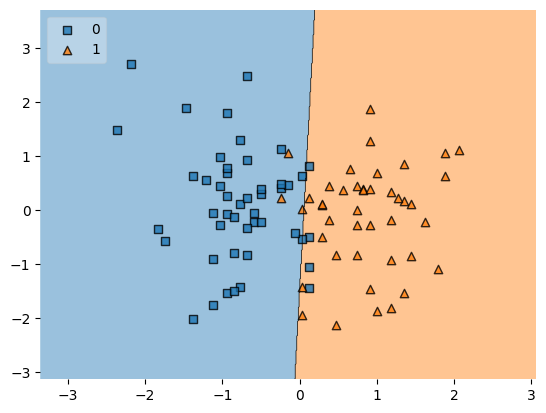

In [28]:
from mlxtend.plotting import plot_decision_regions
     

plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle
     

pickle.dump(clf,open('model.pkl','wb'))